In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json
from pymongo import MongoClient
client = MongoClient()
db = client['gtr']

In [2]:
repo_targets = {}
for doc in db['repo_core_targets'].find():
    repo_targets[doc['repo']] = doc['targets']

In [3]:
def NDCG(repo,rec,repo_targets):
    dcg = 0
    for i,tm in enumerate(rec):
        if tm in repo_targets[repo]:
            dcg += 1/np.log2(i+2)
    target_cnt = 0
    idcg =  0
    for tm in repo_targets[repo]:
        target_cnt += 1
        idcg += 1/np.log2(target_cnt+1)
    dcg /= idcg
    return dcg

In [8]:
recommendations = {}
for doc in db['recommend_social_core'].find():
    recommendations[doc['repo']] = [r[0] for r in doc['rec']]

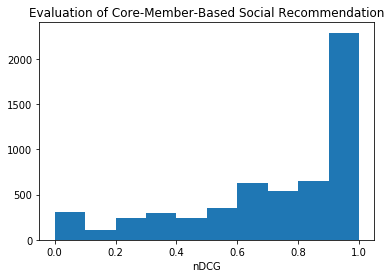

0.0 1.0


In [9]:
NDCGs = []
for repo in recommendations:
    if not repo in repo_targets:
        continue
    NDCGs.append(NDCG(repo,recommendations[repo],repo_targets))
plt.hist(NDCGs)
plt.xlabel("nDCG")
plt.title("Evaluation of Core-Member-Based Social Recommendation")
plt.savefig('evaluate_social.jpg',bbox='tight')
plt.show()
print(min(NDCGs),max(NDCGs))